## <font color=#00BBFF> Loading Data </font>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff #This can create interactive plots
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 

In [116]:
# https://archive.ics.uci.edu/dataset/46/hepatitis 肝炎hepatitis
# https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1  肝硬化活存預測
# fetch dataset 
hepatitis = fetch_ucirepo(id=46) 
  
# data (as pandas dataframes) 
X = hepatitis.data.features 
y = hepatitis.data.targets 
  
df_hepatitis = pd.concat([X, y], axis=1)
print(df_hepatitis) 


     Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
0     30    2      1.0           2      2.0      2.0       2.0        1.0   
1     50    1      1.0           2      1.0      2.0       2.0        1.0   
2     78    1      2.0           2      1.0      2.0       2.0        2.0   
3     31    1      NaN           1      2.0      2.0       2.0        2.0   
4     34    1      2.0           2      2.0      2.0       2.0        2.0   
..   ...  ...      ...         ...      ...      ...       ...        ...   
150   46    1      2.0           2      1.0      1.0       1.0        2.0   
151   44    1      2.0           2      1.0      2.0       2.0        2.0   
152   61    1      1.0           2      1.0      1.0       2.0        1.0   
153   53    2      1.0           2      1.0      2.0       2.0        2.0   
154   43    1      2.0           2      1.0      2.0       2.0        2.0   

     Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
0

In [117]:
df_hepatitis.tail()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2,1
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2,2
154,43,1,2.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2,1


In [118]:
df_hepatitis.shape

(155, 20)

In [119]:
#Check missing values, and counting the total
df_hepatitis.info()
df_hepatitis.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
Class               0
dtype: int64

1. Steroid: It is type of medical in order to treat specific disease.
2. Antivirals: They are a class of medications specifically designed to treat viral infections by inhibiting the virus's ability to multiply within the host's body.(antibiotics are used to treat bacteria.)
3. atigue: extremely tired
4. Malaise: a general feeling of being ill or having no energy, or unconfortable
5. Anorexia: a serious mental illness in which a person does not eat,and often resulting in dangerous weight loss
6. Liver Firm: it means unhealth liver, because the health liver is soft. Firm means hard.
7. Spleen Palpable: It means Spleen can be touched, but the health spleen is unable to be touched.
8. Spiders:It means Spiders Angiomas. The development of multiple spider angiomas is a common sign of chronic liver disease, such as chronic hepatitis.
9. Ascites:It is a medical condition defined by the accumulation of fluid in the abdomen.
10. Varices: tortuous (twisted) veins
11. Bilirubin:It is a key chemical compound monitored in blood tests because high levels often indicate a problem with the 
12. Alk Phosphate:It is a common enzyme found throughout the body, but is highly concentrated in the liver, bones, kidneys, and digestive system.
13. Sgot:In liver disease, the ratio of AST to ALT is often analyzed to help determine the cause of the damage.
14. Albumin:It is a type of protein and produced exclusively by the liver.
15. Protime:It is a crucial test for assessing a person's blood clotting ability and is closely related to liver function.

independent
Age                
Sex               
Steroid          
Antivirals        
Fatigue             
Malaise            
Anorexia           
Liver Big          
Liver Firm         
Spleen Palpable    
Spiders            
Ascites            
Varices             
Bilirubin           
Alk Phosphate      
Sgot               
Albumin            
Protime  

dependent
Histology           

In [120]:
#Check duplicate data
df_hepatitis.duplicated() 
df_hepatitis.duplicated().sum() #calculate the total

np.int64(0)

## <font color=#00BBFF> Handling Missing Values </font>

In [121]:
#Using mode to fill up the missing value
df_copy=df_hepatitis.copy()
mode_Steroidvalue = df_copy['Steroid'].mode()[0]
mode_Fatiguevalue = df_copy['Fatigue'].mode()[0]
mode_Malaisevalue = df_copy['Malaise'].mode()[0]
mode_Anorexiavalue = df_copy['Anorexia'].mode()[0]
mode_LiverBigvalue = df_copy['Liver Big'].mode()[0]
mode_LiverFirmvalue = df_copy['Liver Firm'].mode()[0]
mode_SpleenPalpablevalue = df_copy['Spleen Palpable'].mode()[0]
mode_Spidersvalue = df_copy['Spiders'].mode()[0]
mode_Ascitesvalue = df_copy['Ascites'].mode()[0]
mode_Varicesvalue = df_copy['Varices'].mode()[0]
df_copy['Steroid'] = df_copy['Steroid'].fillna(mode_Steroidvalue)
df_copy['Fatigue'] = df_copy['Fatigue'].fillna(mode_Fatiguevalue)
df_copy['Malaise'] = df_copy['Malaise'].fillna(mode_Malaisevalue)
df_copy['Anorexia'] = df_copy['Anorexia'].fillna(mode_Anorexiavalue)
df_copy['Liver Big'] = df_copy['Liver Big'].fillna(mode_Steroidvalue)
df_copy['Liver Firm'] = df_copy['Liver Firm'].fillna(mode_Fatiguevalue)
df_copy['Spleen Palpable'] = df_copy['Spleen Palpable'].fillna(mode_Malaisevalue)
df_copy['Spiders'] = df_copy['Spiders'].fillna(mode_Anorexiavalue)
df_copy['Ascites'] = df_copy['Ascites'].fillna(mode_Anorexiavalue)
df_copy['Varices'] = df_copy['Varices'].fillna(mode_Anorexiavalue)

In [122]:
#Using median to fill up the missing value
median_Bilirubin = df_copy['Bilirubin'].median()
median_Sgot = df_copy['Sgot'].median()
df_copy['Bilirubin'] = df_copy['Bilirubin'].fillna(median_Bilirubin)
df_copy['Sgot'] = df_copy['Sgot'].fillna(median_Sgot)

In [123]:
#use MICE handle missing values
# 1. 重新定義：只納入數值型高遺失率欄位
mice_numeric_cols = [
    'Alk Phosphate',
    'Albumin',
    'Protime',
]

# 2. 確保數值型態 (針對我們要處理的欄位)
# 將任何無法識別的字串轉換為 np.nan
for col in mice_numeric_cols:
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

# 3. 初始化 MICE 估算器
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

data_to_impute = df_copy[mice_numeric_cols].values 
imputed_data = imputer.fit_transform(data_to_impute)

df_copy[mice_numeric_cols] = imputed_data 

In [124]:
df_copy.isnull().sum()

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
Class              0
dtype: int64

## <font color=#00BBFF> Revise Type of Columns </font>

In [125]:
col_type= ['Steroid','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices']
for col in col_type:
    df_copy[col] = df_copy[col].astype(int)

In [126]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,155.0,41.200000,12.565878,7.0,32.000000,39.000000,50.000000,78.0
Sex,155.0,1.103226,0.305240,1.0,1.000000,1.000000,1.000000,2.0
Steroid,155.0,1.509677,0.501527,1.0,1.000000,2.000000,2.000000,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.000000,2.000000,2.000000,2.0
Fatigue,155.0,1.348387,0.478004,1.0,1.000000,1.000000,2.000000,2.0
Malaise,155.0,1.606452,0.490120,1.0,1.000000,2.000000,2.000000,2.0
Anorexia,155.0,1.793548,0.406070,1.0,2.000000,2.000000,2.000000,2.0
Liver Big,155.0,1.838710,0.368991,1.0,2.000000,2.000000,2.000000,2.0
Liver Firm,155.0,1.541935,0.499853,1.0,1.000000,2.000000,2.000000,2.0
Spleen Palpable,155.0,1.806452,0.396360,1.0,2.000000,2.000000,2.000000,2.0


In [133]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          155 non-null    int64  
 3   Antivirals       155 non-null    int64  
 4   Fatigue          155 non-null    int64  
 5   Malaise          155 non-null    int64  
 6   Anorexia         155 non-null    int64  
 7   Liver Big        155 non-null    int64  
 8   Liver Firm       155 non-null    int64  
 9   Spleen Palpable  155 non-null    int64  
 10  Spiders          155 non-null    int64  
 11  Ascites          155 non-null    int64  
 12  Varices          155 non-null    int64  
 13  Bilirubin        155 non-null    float64
 14  Alk Phosphate    155 non-null    float64
 15  Sgot             155 non-null    float64
 16  Albumin          155 non-null    float64
 17  Protime         

In [127]:
plt.rcParams.update({
    'figure.facecolor': 'white',  # 整個畫布的背景色
    'axes.facecolor': 'white',    # 座標軸的背景色
    'axes.edgecolor': 'black',    # 座標軸邊框
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.grid': False,
    'grid.color': 'gray',
    'grid.alpha': 0.3,
    'figure.figsize': [12, 10],
    'figure.dpi': 120,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.linewidth': 1.5,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'text.usetex': False,
    'axes.autolimit_mode': 'round_numbers',
    'axes.xmargin': 0.1,
    'axes.ymargin': 0.1,
    'axes.prop_cycle': plt.cycler('color', ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB'])
})

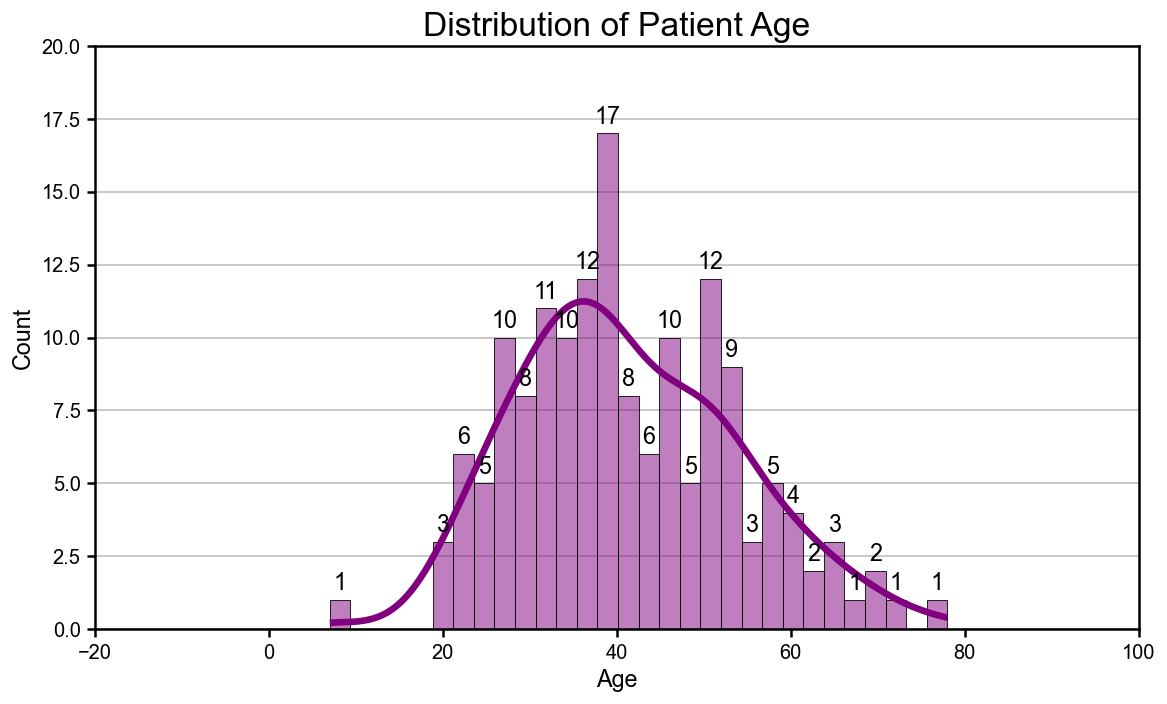

In [128]:
plt.figure(figsize=(10, 6))
ax_plots=sns.histplot(
    data=df_copy,
    kde=True, #adding curve in plot
    x='Age',  
    bins=30,  
    color='purple',
    edgecolor='black'
)
for num in ax_plots.containers: #containers is Matplotlib of property 
    labels = [int(h) for h in num.datavalues] #datavalues also a Metaplotlib of property
    non_zero_labels = [str(y) if y > 0 else '' for y in labels]#turn int to str, so we can let 0 became space
    ax_plots.bar_label(num, non_zero_labels, padding=3) #padding=3 means leave distance of 3 units
        
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

In [129]:
#imbalance
df_hepatitis['Sex'].value_counts(normalize=True)


Sex
1    0.896774
2    0.103226
Name: proportion, dtype: float64

In [130]:
df_copy['Histology'].value_counts(normalize=True)

Histology
1    0.548387
2    0.451613
Name: proportion, dtype: float64

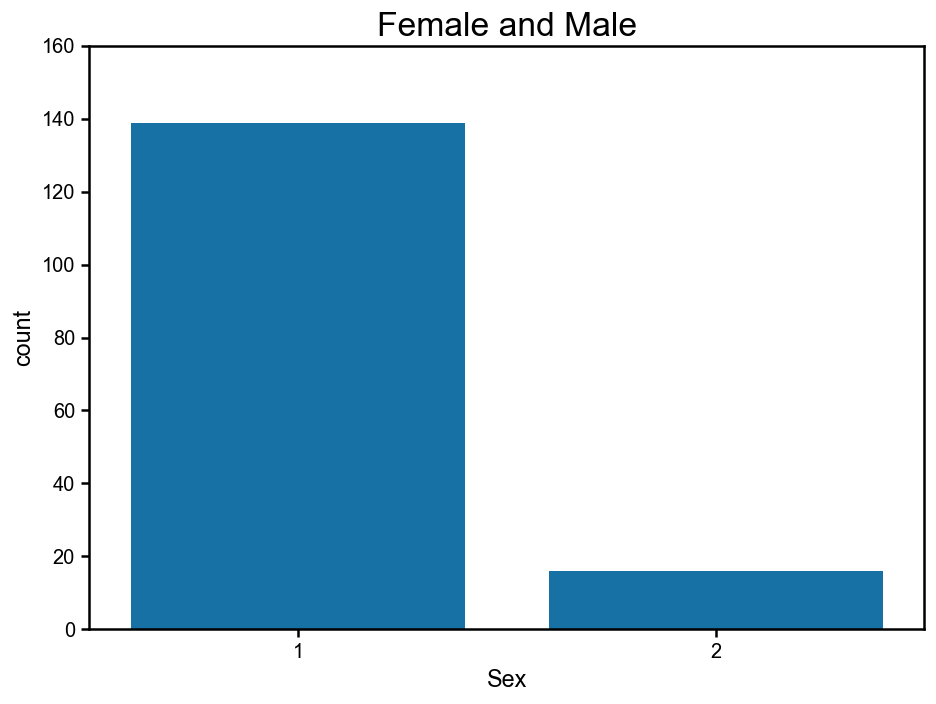

In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Sex')
plt.title("Female and Male")
plt.show()

--- 數值變數摘要統計 (Describe) ---
               count        mean        std   min        25%         50%  \
Age            155.0   41.200000  12.565878   7.0  32.000000   39.000000   
Bilirubin      155.0    1.410968   1.191178   0.3   0.800000    1.000000   
Alk Phosphate  155.0  105.343157  46.412880  26.0  78.000000  100.000000   
Sgot           155.0   85.174194  88.590122  14.0  32.500000   58.000000   
Albumin        155.0    3.815916   0.617294   2.1   3.500000    3.900000   
Protime        155.0   61.668188  17.312699   0.0  55.891424   61.672837   

                      75%    max  
Age             50.000000   78.0  
Bilirubin        1.500000    8.0  
Alk Phosphate  119.500000  295.0  
Sgot            99.000000  648.0  
Albumin          4.200000    6.4  
Protime         65.805986  100.0  

--- 類別變數頻率計數 (Value Counts) ---

--- Sex 頻率 ---
Sex
1    89.68%
2    10.32%
Name: proportion, dtype: object

--- Steroid 頻率 ---
Steroid
2    50.97%
1    49.03%
Name: proportion, dtype: object



<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

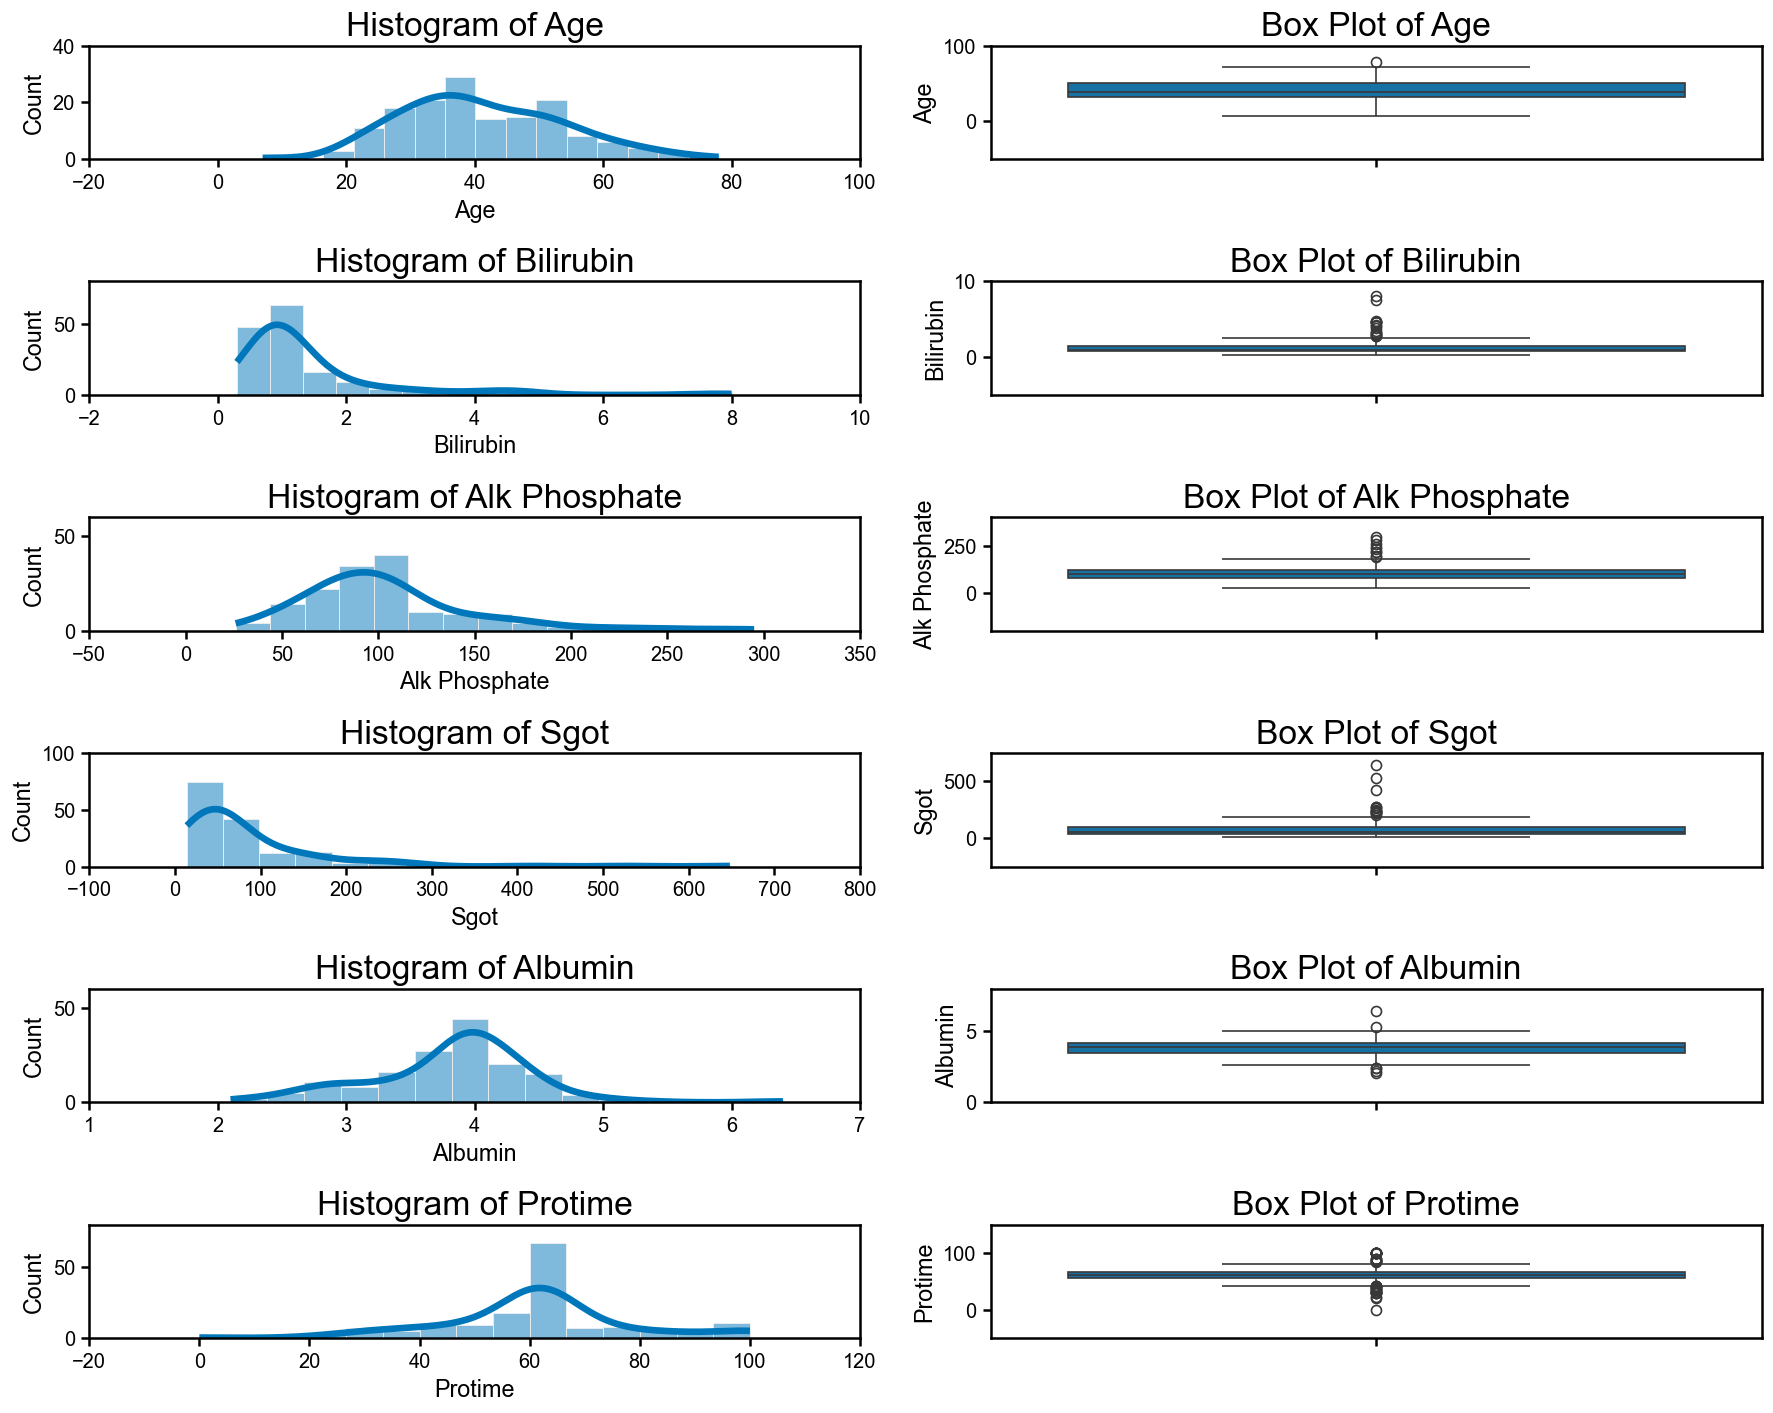

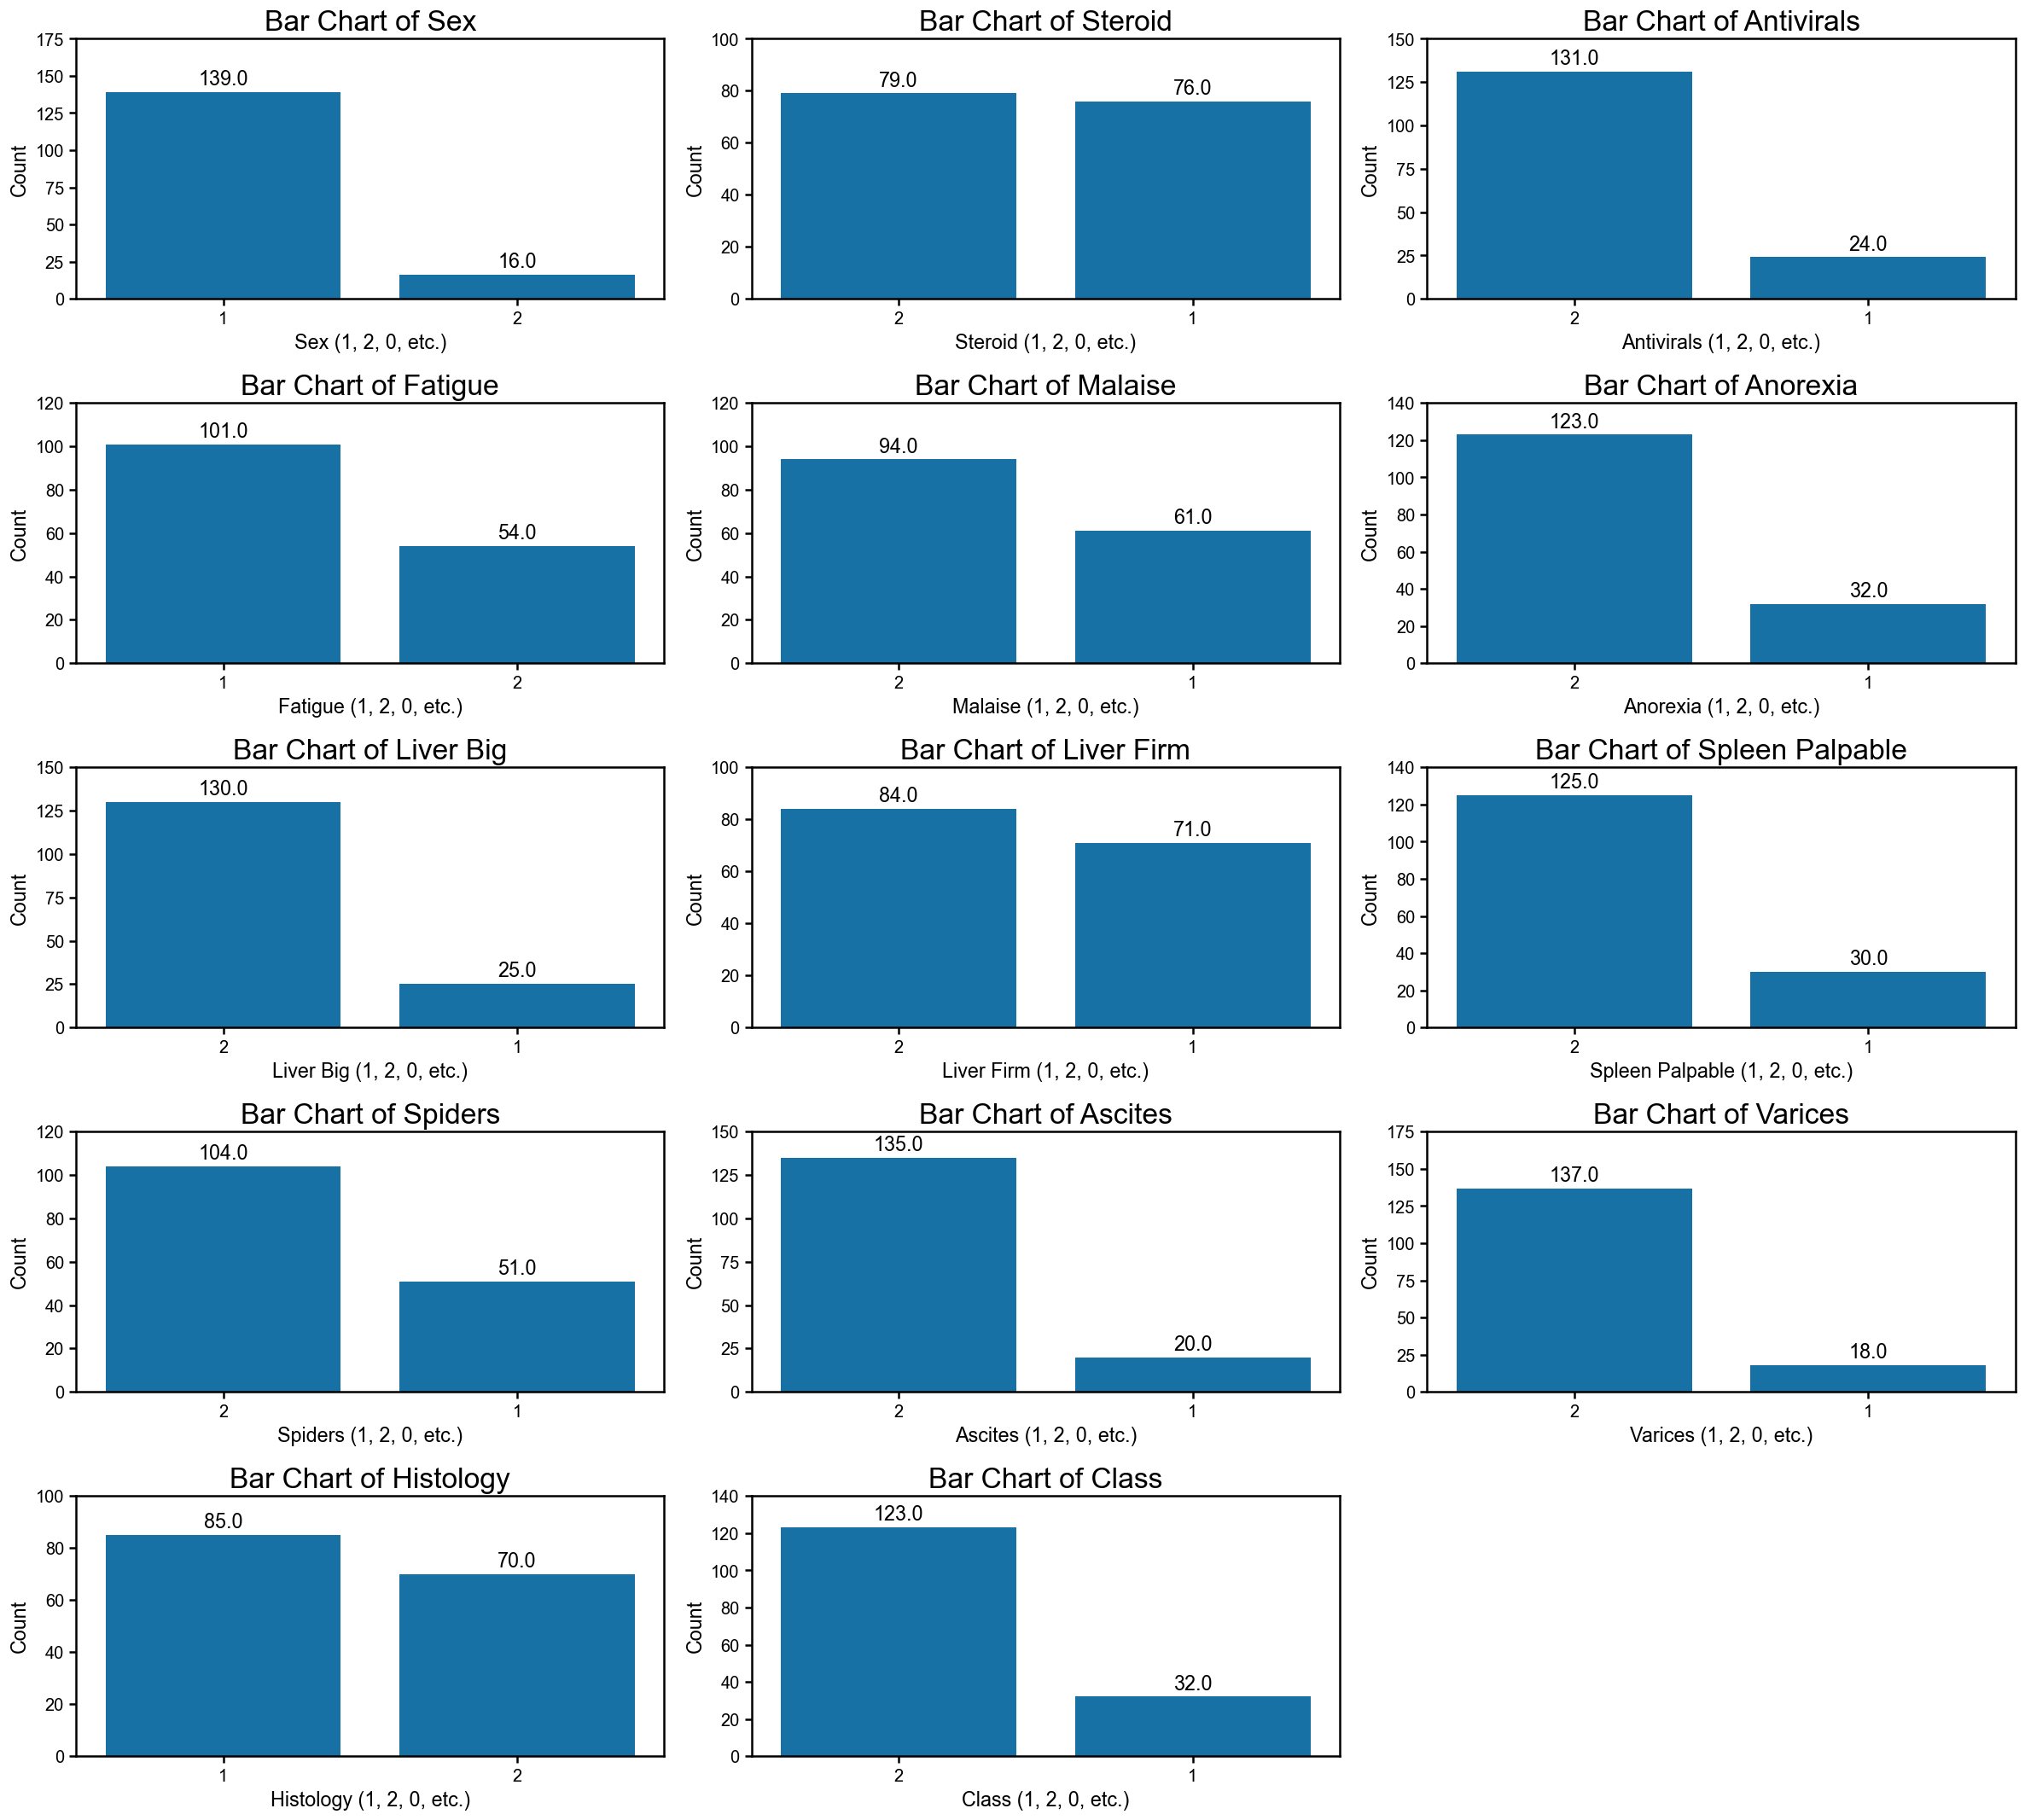

In [134]:
numeric_cols = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

print("--- 數值變數摘要統計 (Describe) ---")
print(df_copy[numeric_cols].describe().T)

categorical_cols = [
    'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 
    'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 
    'Varices', 'Histology', 'Class'
]

print("\n--- 類別變數頻率計數 (Value Counts) ---")
for col in categorical_cols:
    print(f"\n--- {col} 頻率 ---")
    print(df_copy[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    # 直方圖
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    sns.histplot(df_copy[col], kde=True, bins=15)
    plt.title(f'Histogram of {col}')
    
    # 箱型圖
    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    sns.boxplot(y=df_copy[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 18))
n_rows = int(np.ceil(len(categorical_cols) / 3))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 3, i + 1)
    ax = sns.countplot(x=col, data=df_copy, order=df_copy[col].value_counts().index)
    
    # 標記實際數值 (如果需要)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(f'{col} (1, 2, 0, etc.)') # 提醒自己這些是編碼
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [71]:
selected_feature=['Fatigue','Malaise','Anorexia','Liver Firm','Liver Big','Albumin','Spiders','Varices','Protime','Class'] # what kind of features you want to observ
correlation_matrix = df_copy[selected_feature].corr().round(4).values #round() can let decrease the number of decimal places 
fig_heatmap = ff.create_annotated_heatmap(
    z=correlation_matrix,
    x=selected_feature,
    y=selected_feature,
    colorscale='Reds' # you can use "Plasma", "Viridis", "Reds", "Blues", "RdBu", "Portland", "Spectral"
)
fig_heatmap.update_layout(
    font=dict(size=10),
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()

交叉比例表:
 Class             1         2
Histology                    
1          0.082353  0.917647
2          0.357143  0.642857


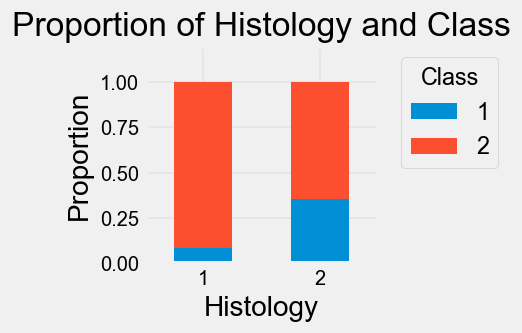

In [136]:
# 1. 計算比例交叉表 (保持不變)
crosstab_proportions = pd.crosstab(
    df_copy['Histology'],
    df_copy['Class'],
    normalize='index' # 關鍵：正規化每行 (Histology)
)

print("交叉比例表:\n", crosstab_proportions)

# --- 2. 繪製比例堆疊長條圖 (修正這部分) ---
# 關鍵：將 plot() 的結果儲存到 ax 變數中
ax = crosstab_proportions.plot(
    kind='bar', 
    stacked=True,
    figsize=(4, 3) # 將大小參數直接傳遞給 plot() 函式
)

# 使用 ax.set_xxx() 來設置標題和標籤
ax.set_title('Proportion of Histology and Class')
ax.set_xlabel('Histology')
ax.set_ylabel('Proportion')

# 使用 ax.tick_params() 或 ax.set_xticklabels() 設置 x 軸標籤旋轉
ax.tick_params(axis='x', rotation=0) 

# 使用 ax.legend() 設置圖例
ax.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # 讓圖例不會被裁切
plt.show()

In [ ]:
#Certain features you would like to concern
selected_feature=['Fatigue','Malaise','Anorexia','Liver Firm','Liver Big','Albumin','Spiders','Varices','Protime','Class'] # what kind of features you want to observ
correlation_matrix = df_hepatitis[selected_feature].corr().round(4).values #round() can let decrease the number of decimal places 
fig_heatmap = ff.create_annotated_heatmap(
    z=correlation_matrix,
    x=selected_feature,
    y=selected_feature,
    colorscale='Reds' # you can use "Plasma", "Viridis", "Reds", "Blues", "RdBu", "Portland", "Spectral"
)
fig_heatmap.update_layout(
    font=dict(size=10),
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()

In [ ]:
#Correlation heatmap
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 20))
sns.heatmap(df_hepatitis.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()